<a href="https://colab.research.google.com/github/HannanTechy/mean-reversion-using-python/blob/main/mean_reverse.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import yfinance as yf

# Define the stock symbol
symbol = "AAPL"

# Retrieve real-time data
data = yf.download(symbol, period="1d", interval="1m")

# Print the data
print(data)


[*********************100%***********************]  1 of 1 completed
                                 Open        High         Low       Close  \
Datetime                                                                    
2023-05-05 09:30:00-04:00  170.975006  171.440002  170.820007  171.235001   
2023-05-05 09:31:00-04:00  171.279999  171.309998  170.759995  171.279007   
2023-05-05 09:32:00-04:00  171.270004  171.490005  171.220001  171.378998   
2023-05-05 09:33:00-04:00  171.380005  172.250000  171.250000  172.240005   
2023-05-05 09:34:00-04:00  172.229996  172.399994  172.050003  172.235001   
...                               ...         ...         ...         ...   
2023-05-05 15:53:00-04:00  173.544998  173.659897  173.509995  173.600006   
2023-05-05 15:54:00-04:00  173.600006  173.725006  173.597794  173.652206   
2023-05-05 15:55:00-04:00  173.660004  173.699997  173.490005  173.520004   
2023-05-05 15:56:00-04:00  173.520004  173.600006  173.520004  173.589996   
2023-05

In [ ]:
# Compute rolling mean and standard deviation
window = 20
rolling_mean = data['Close'].rolling(window=window).mean()
rolling_std = data['Close'].rolling(window=window).std()


In [ ]:
# Compute upper and lower bands
upper_band = rolling_mean + (2 * rolling_std)
lower_band = rolling_mean - (2 * rolling_std)



In [ ]:
# Compute z-score
z_score = (data['Close'] - rolling_mean) / rolling_std

In [ ]:
# Define trading signals
data['buy_signal'] = (z_score < -1.0).astype(int)
data['sell_signal'] = (z_score > 1.0).astype(int)


In [ ]:

# Compute returns
data['returns'] = data['Close'].pct_change()

# Compute strategy returns
data['strategy_returns'] = data['returns'] * data['buy_signal'].shift(1) - data['returns'] * data['sell_signal'].shift(1)

# Compute cumulative returns
data['cumulative_returns'] = (1 + data['strategy_returns']).cumprod()


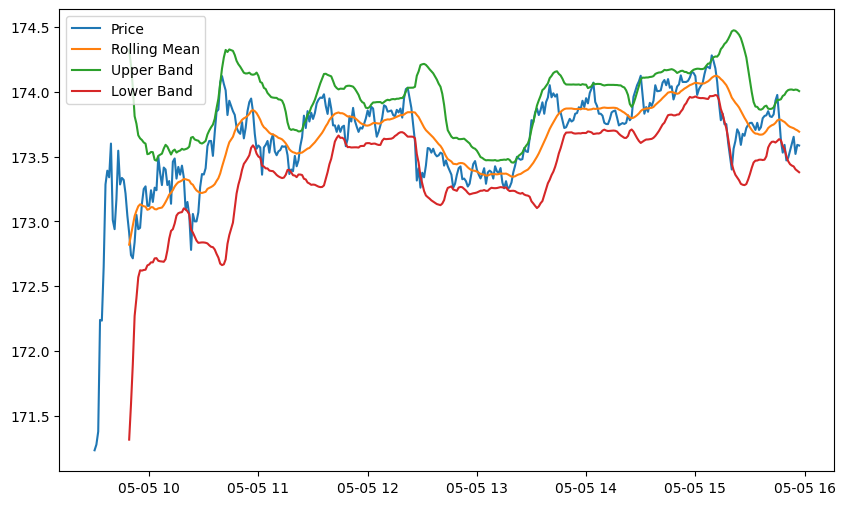

In [ ]:
# Plot results
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(data['Close'], label='Price')
ax.plot(rolling_mean, label='Rolling Mean')
ax.plot(upper_band, label='Upper Band')
ax.plot(lower_band, label='Lower Band')
ax.legend(loc='upper left')
plt.show()